# Figures for Strucutural Studies of a MgNiY Glass

This notebook shows how the figures are formed for (Insert paper citation).

This notebook doens't show the full analysis steps as that is shown elsewhere. Otherwise you can always send an email to Carter Francis (csfrancis@wisc.edu) if additional information on the chracterization is necessary.

The notebook is split into a couple of different sections related to the different figures created for this paper. 

1. <a href='#clus'> Cluster Finding using symmetry STEM</a>
2. <a href='#tem'> Viewing HRTEM and Diffraction Patterns</a>
3. <a href='#dsc'> DSC Results</a>

In [1]:
import hyperspy.api as hs
import numpy as np
from skimage._shared.fft import fftmodule, next_fast_len
from functools import partial
import matplotlib.pyplot as plt
import xrayutilities as xru
from xrayutilities.materials.cif import CIFFile
from xrayutilities.materials.material import Crystal
import numpy as np
import diffpy.structure 
from diffsims.libraries.structure_library import StructureLibrary
from diffsims.generators.diffraction_generator import DiffractionGenerator
from diffsims.generators.library_generator import DiffractionLibraryGenerator
from diffsims.generators.zap_map_generator import get_rotation_from_z_to_direction, generate_zap_map
from diffsims.generators.rotation_list_generators import get_grid_around_beam_direction
import matplotlib.pyplot as plt

# <a id='clus'></a> Cluster Finding Using Symmetry STEM

This section loads a correlation signal and then gets the Symmetry STEM from the signal.

From the Symmetry STEM signal then the signal is split between the first and second rings, blurred and then peaks are found.

This is the Differnece of Gaussians Method for finding clusters in some n-dimensional space

In [2]:
cor = hs.load("correlation.hspy")
symmetries = [1,2,4,6,10]
ss = cor.get_symmetry_stem(symmetries=symmetries)
ss1= ss.isig[3.0:5.5] # first ring
ss2= ss.isig[5.5:7.5] # second ring
blurred1 = ss1.get_blurred_library(sigma_ratio=1.1)
blurred2 = ss2.get_blurred_library(sigma_ratio=1.1)
blurred1std = np.std(blurred1.data)*2
blurred1.find_peaks(threshold_abs=blurred1std)
blurred2std = np.std(blurred2.data)*2
blurred2.find_peaks(threshold_abs=blurred2std)

[[0.56505859 0.56505859 0.         2.        ]
 [0.62156444 0.62156444 0.         2.        ]
 [0.68372089 0.68372089 0.         2.        ]
 [0.75209298 0.75209298 0.         2.        ]
 [0.82730227 0.82730227 0.         2.        ]
 [0.9100325  0.9100325  0.         2.        ]
 [1.00103575 1.00103575 0.         2.        ]
 [1.10113933 1.10113933 0.         2.        ]
 [1.21125326 1.21125326 0.         2.        ]
 [1.33237859 1.33237859 0.         2.        ]
 [1.46561645 1.46561645 0.         2.        ]
 [1.61217809 1.61217809 0.         2.        ]
 [1.7733959  1.7733959  0.         2.        ]
 [1.95073549 1.95073549 0.         2.        ]
 [2.14580904 2.14580904 0.         2.        ]
 [2.36038994 2.36038994 0.         2.        ]
 [2.59642894 2.59642894 0.         2.        ]
 [2.85607183 2.85607183 0.         2.        ]
 [3.14167901 3.14167901 0.         2.        ]
 [3.45584691 3.45584691 0.         2.        ]
 [3.8014316  3.8014316  0.         2.        ]
 [4.18157476 

[########################################] | 100% Completed |  0.1s
[[0.56505859 0.56505859 0.         2.        ]
 [0.62156444 0.62156444 0.         2.        ]
 [0.68372089 0.68372089 0.         2.        ]
 [0.75209298 0.75209298 0.         2.        ]
 [0.82730227 0.82730227 0.         2.        ]
 [0.9100325  0.9100325  0.         2.        ]
 [1.00103575 1.00103575 0.         2.        ]
 [1.10113933 1.10113933 0.         2.        ]
 [1.21125326 1.21125326 0.         2.        ]
 [1.33237859 1.33237859 0.         2.        ]
 [1.46561645 1.46561645 0.         2.        ]
 [1.61217809 1.61217809 0.         2.        ]
 [1.7733959  1.7733959  0.         2.        ]
 [1.95073549 1.95073549 0.         2.        ]
 [2.14580904 2.14580904 0.         2.        ]
 [2.36038994 2.36038994 0.         2.        ]
 [2.59642894 2.59642894 0.         2.        ]
 [2.85607183 2.85607183 0.         2.        ]
 [3.14167901 3.14167901 0.         2.        ]
 [3.45584691 3.45584691 0.         2.  

[########################################] | 100% Completed |  0.1s


data shape (25, 400, 400, 27)
data shape (25, 400, 400, 27)
data shape (25, 400, 400, 27)
data shape (25, 400, 400, 27)
data shape (25, 400, 400, 27)
sigma: [0.56505859 0.62156444 0.68372089 0.75209298 0.82730227 0.9100325
 1.00103575 1.10113933 1.21125326 1.33237859 1.46561645 1.61217809
 1.7733959  1.95073549 2.14580904 2.36038994 2.59642894 2.85607183
 3.14167901 3.45584691 3.8014316  4.18157476 4.59973224 5.05970546
 5.56567601 6.12224361]


data shape (25, 400, 400, 22)
data shape (25, 400, 400, 22)
data shape (25, 400, 400, 22)
data shape (25, 400, 400, 22)
data shape (25, 400, 400, 22)
sigma: [0.56505859 0.62156444 0.68372089 0.75209298 0.82730227 0.9100325
 1.00103575 1.10113933 1.21125326 1.33237859 1.46561645 1.61217809
 1.7733959  1.95073549 2.14580904 2.36038994 2.59642894 2.85607183
 3.14167901 3.45584691 3.8014316  4.18157476 4.59973224 5.05970546
 5.56567601 6.12224361]


[[],
 [Cluster(cx=183.167, cy=209.713, r=6.33165),
  Cluster(cx=9.7335, cy=234.489, r=5.75604),
  Cluster(cx=111.493, cy=248.647, r=4.75706),
  Cluster(cx=84.0621, cy=204.404, r=3.93146),
  Cluster(cx=160.16, cy=243.338, r=5.75604),
  Cluster(cx=188.476, cy=161.045, r=3.93146),
  Cluster(cx=56.6313, cy=50.4372, r=4.3246),
  Cluster(cx=7.96378, cy=331.824, r=3.93146),
  Cluster(cx=175.203, cy=148.657, r=3.93146),
  Cluster(cx=174.318, cy=185.821, r=4.75706),
  Cluster(cx=27.4308, cy=32.74, r=3.93146),
  Cluster(cx=37.1643, cy=117.687, r=5.23277),
  Cluster(cx=158.391, cy=196.44, r=3.57405),
  Cluster(cx=84.0621, cy=190.246, r=3.57405),
  Cluster(cx=67.2497, cy=177.858, r=3.93146),
  Cluster(cx=198.21, cy=290.235, r=4.75706),
  Cluster(cx=68.1345, cy=109.723, r=3.57405),
  Cluster(cx=331.824, cy=95.5653, r=6.33165),
  Cluster(cx=235.374, cy=78.7529, r=3.93146),
  Cluster(cx=18.5821, cy=187.591, r=4.75706),
  Cluster(cx=59.2859, cy=207.058, r=2.95376),
  Cluster(cx=24.7762, cy=53.0918, r=

/srv/home/csfrancis/pyxem/pyxem/signals/symmetry1d.py:307: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s_extent) for ks in k_range])


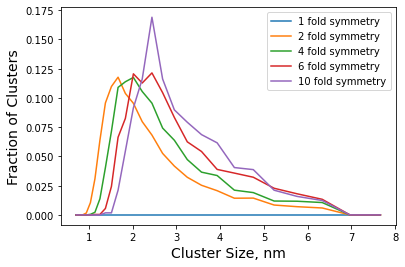

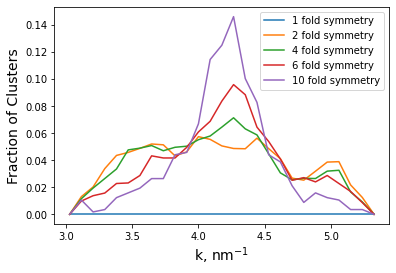

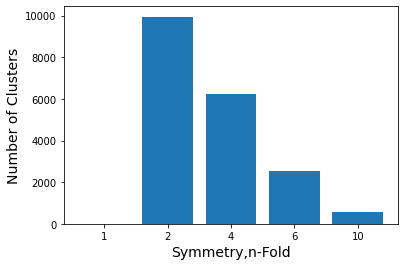

In [3]:
blurred1.plot_cluster_size_distribution(normalize=True)
blurred1.plot_k_range_distribution(normalize=True)
blurred1.plot_cluster_numbers()

/srv/home/csfrancis/pyxem/pyxem/signals/symmetry1d.py:307: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s_extent) for ks in k_range])


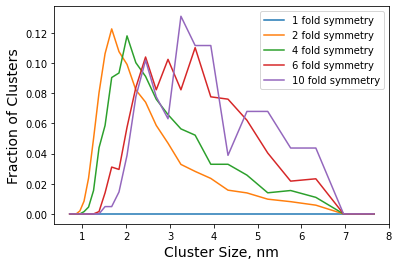

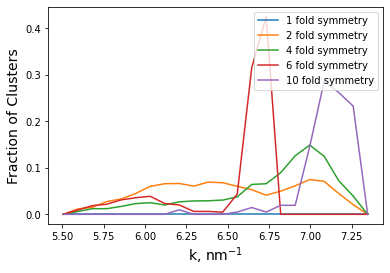

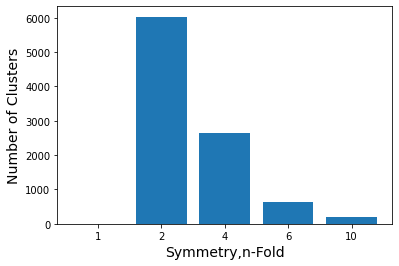

In [4]:
blurred2.plot_cluster_size_distribution(normalize=True)
blurred2.plot_k_range_distribution(normalize=True)
blurred2.plot_cluster_numbers()

In [12]:
mg_metallic = 72
ni_metallic = 70
y_metallic = 90

In [43]:
mg_mg =  mg_metallic * 2
mg_ni =  1000/(mg_metallic + ni_metallic)
mg_y = mg_metallic + y_metallic
print(mg_ni)

7.042253521126761


/srv/home/csfrancis/pyxem/pyxem/signals/symmetry1d.py:307: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s_extent) for ks in k_range])


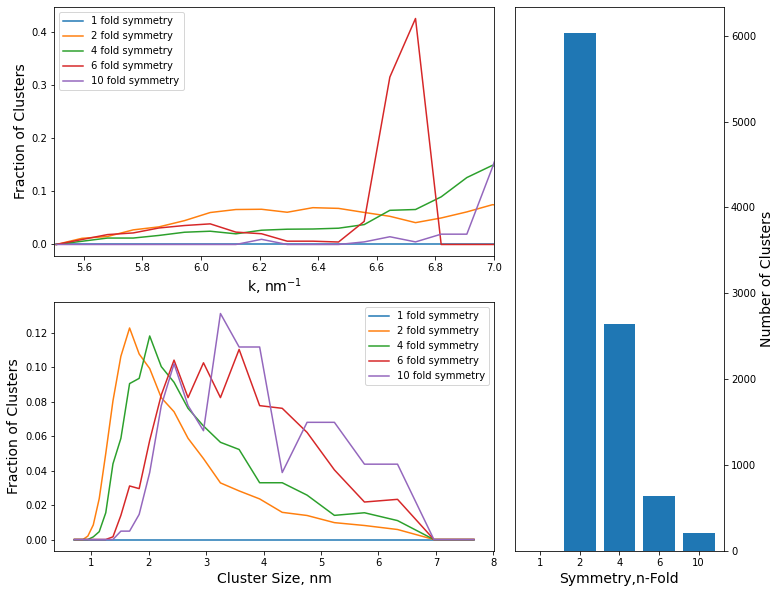

In [5]:
from matplotlib.pyplot import GridSpec
fig = plt.figure(figsize=(12,10))
gs = GridSpec(8,3, figure=fig,hspace=1.7, wspace=0.1)

#plotting k range distrabution
k_plot = fig.add_subplot(gs[0:4,0:2])
k_plot.set_xlim([5.5, 7.0])
blurred2.plot_k_range_distribution(normalize=True, ax=k_plot)
k_plot.legend(loc='upper left')

#plotting size range distrabution
size_plot = fig.add_subplot(gs[4:,0:2])
blurred2.plot_cluster_size_distribution(normalize=True, ax=size_plot)

# plotting number of clusters
num_plot = fig.add_subplot(gs[:,2])
blurred2.plot_cluster_numbers(ax=num_plot)
num_plot.yaxis.set_label_position("right")
num_plot.yaxis.tick_right()

/srv/home/csfrancis/pyxem/pyxem/signals/symmetry1d.py:307: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s_extent) for ks in k_range])
/srv/home/csfrancis/pyxem/pyxem/signals/symmetry1d.py:307: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s_extent) for ks in k_range])


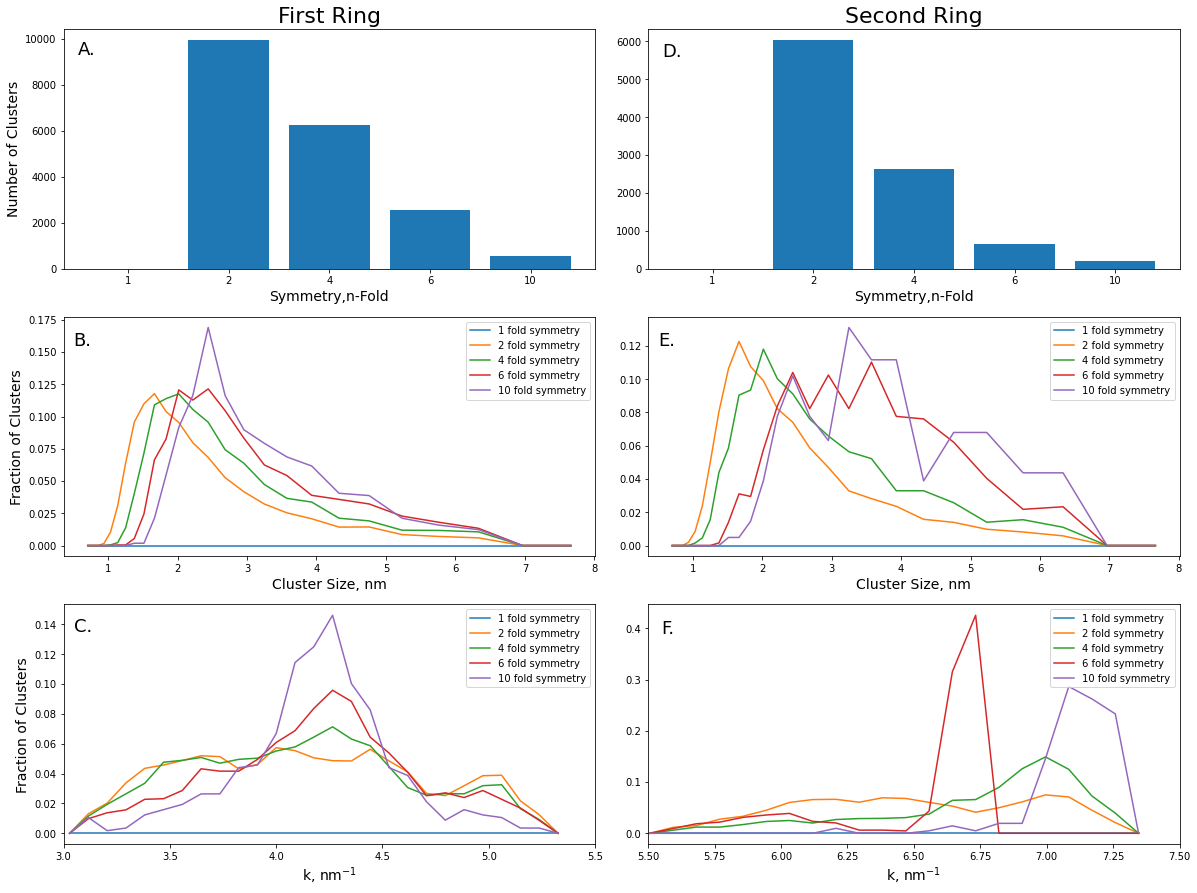

In [81]:
from matplotlib.pyplot import GridSpec
fig = plt.figure(figsize=(20,15))
gs = GridSpec(3,2, figure=fig,hspace=.2, wspace=0.1)

#plotting k range distrabution
k_plot1 = fig.add_subplot(gs[2,0])
k_plot1.set_xlim([3.0, 5.5])
blurred1.plot_k_range_distribution(normalize=True, ax=k_plot1)
k_plot1.legend(loc='upper right')
k_plot1.text(3.05,.135, "C.", fontsize=18)

#plotting size range distrabution
size_plot1 = fig.add_subplot(gs[1,0])
blurred1.plot_cluster_size_distribution(normalize=True, ax=size_plot1)
size_plot1.text(.5,.155, "B.", fontsize=18)

# plotting number of clusters
num_plot1 = fig.add_subplot(gs[0,0])
blurred1.plot_cluster_numbers(ax=num_plot1)
num_plot1.set_title("First Ring", fontsize=22)
num_plot1.text(-.5,9300, "A.", fontsize=18)


#plotting k range distrabution
k_plot = fig.add_subplot(gs[2,1])
k_plot.set_xlim([5.5, 7.5])
blurred2.plot_k_range_distribution(normalize=True, ax=k_plot)
k_plot.set_ylabel("")
k_plot.text(5.55,.39, "F.", fontsize=18)

#plotting size range distrabution
size_plot = fig.add_subplot(gs[1,1])
blurred2.plot_cluster_size_distribution(normalize=True, ax=size_plot)
size_plot.set_ylabel("")
size_plot.text(.5,.12, "E.", fontsize=18)

# plotting number of clusters
num_plot = fig.add_subplot(gs[0,1])
blurred2.plot_cluster_numbers(ax=num_plot)
num_plot.set_ylabel("")
num_plot.set_title("Second Ring", fontsize=22)
num_plot.text(-.5,5600, "D.", fontsize=18)


plt.savefig("Clusters", dpi=800)

Figure 4: The figure above shows the clusters determined from the first and second rings in the diffraction pattern.  Figures 4a and 4d show the numbers of clusters determined. Figures 4b and 4e show the fraction of clusters identified and the size of each cluster. Figures 4c and 4f show the fraction of clusters identified at each diffraction vector k.  For figures 4b,4c, 4e and 4f the fraction of clusters is given as the number of clusters at some point normalized by the number of clusters given in figures 4a and 4b

# <a id='tem'></a> HRTEM and Diffraction

In [82]:
import SeqIO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=14)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(images[11], extent=[0,ext,0,ext], cmap="gray")
scalebar = AnchoredSizeBar(ax.transData,
                           5, '5 nm', 'lower left', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=.25,
                           fontproperties=fontprops)

ax.add_artist(scalebar)
ax.set_yticks([])
ax.set_xticks([])